In [1]:
import keras

Using TensorFlow backend.


In [2]:
#from keras.preprocessing import image
#from keras.engine import Layer
from keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras import optimizers
#from keras.layers import Activation, Dense, Dropout, Flatten
#from keras.layers.normalization import BatchNormalization
#from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#from time import time
import numpy as np
#import os
#import random
import tensorflow as tf
from PIL import Image, ImageFile
import matplotlib.pyplot as plt


In [3]:
train_dir = './dataset/train'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


x = bw.flow_from_directory(train_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

y = c.flow_from_directory(train_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

train_generator = zip(x, y)



Found 681 images belonging to 1 classes.
Found 681 images belonging to 1 classes.


In [4]:
validation_dir = './dataset/validation'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


x = bw.flow_from_directory(validation_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

y = c.flow_from_directory(validation_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

validation_generator = zip(x, y)

Found 193 images belonging to 1 classes.
Found 193 images belonging to 1 classes.


In [5]:
#Encoder
encoder_input = Input(shape=(224, 224, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

In [6]:
#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(3, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

In [7]:
#model.summary()

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt, loss='mse', metrics=['accuracy'])

In [9]:
# steps_per_epoch: Total number of steps (batches of samples) to yield from generator
# before declaring one epoch finished and starting the next epoch.
# It should typically be equal to the number of samples if your dataset divided by the batch size.
#steps = 34 ### 2)100/62%acc #### 1)21/50%acc
#val_steps = 9
#iterations = 20 ### 2)30 ### 1)20

#history = model.fit_generator(train_generator,
#                              steps_per_epoch=steps,
#                              epochs=iterations,
#                              validation_data=validation_generator,
#                              validation_steps=val_steps)

In [10]:
#model.save_weights('testModel_weights(34steps20epochs).h5')

In [11]:
# import matplotlib.pyplot as plt

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Traning acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training & validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Traning loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training & validation loss')
# plt.legend()

# plt.show()

In [12]:
# history

In [13]:
model.load_weights("testModel(30steps500epochs).h5")
#model.load_weights("testModel_weights(34steps20epochs).h5")

In [14]:
test_dir = './dataset/test'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


test_x = bw.flow_from_directory(test_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

test_y = bw.flow_from_directory(test_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)


Found 11 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [15]:
#test_x[0]

In [16]:
testpic = model.predict_on_batch(test_x[0])
#testpic[0]

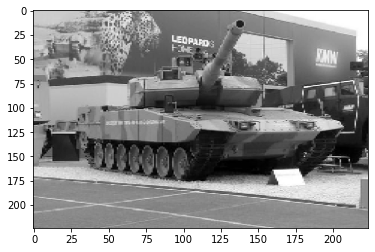

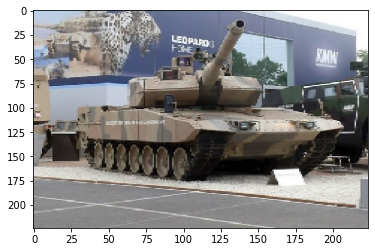

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


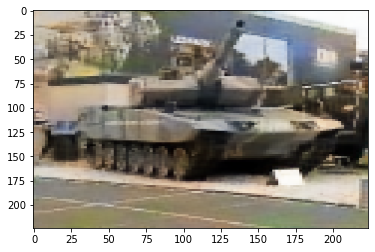

In [17]:
plt.imshow(test_x[0][1],aspect="auto", cmap=plt.get_cmap('gray'))
plt.show()

plt.imshow(test_y[0][1],aspect="auto")
plt.show()
#print(x[0])

plt.imshow(testpic[1],aspect="auto")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


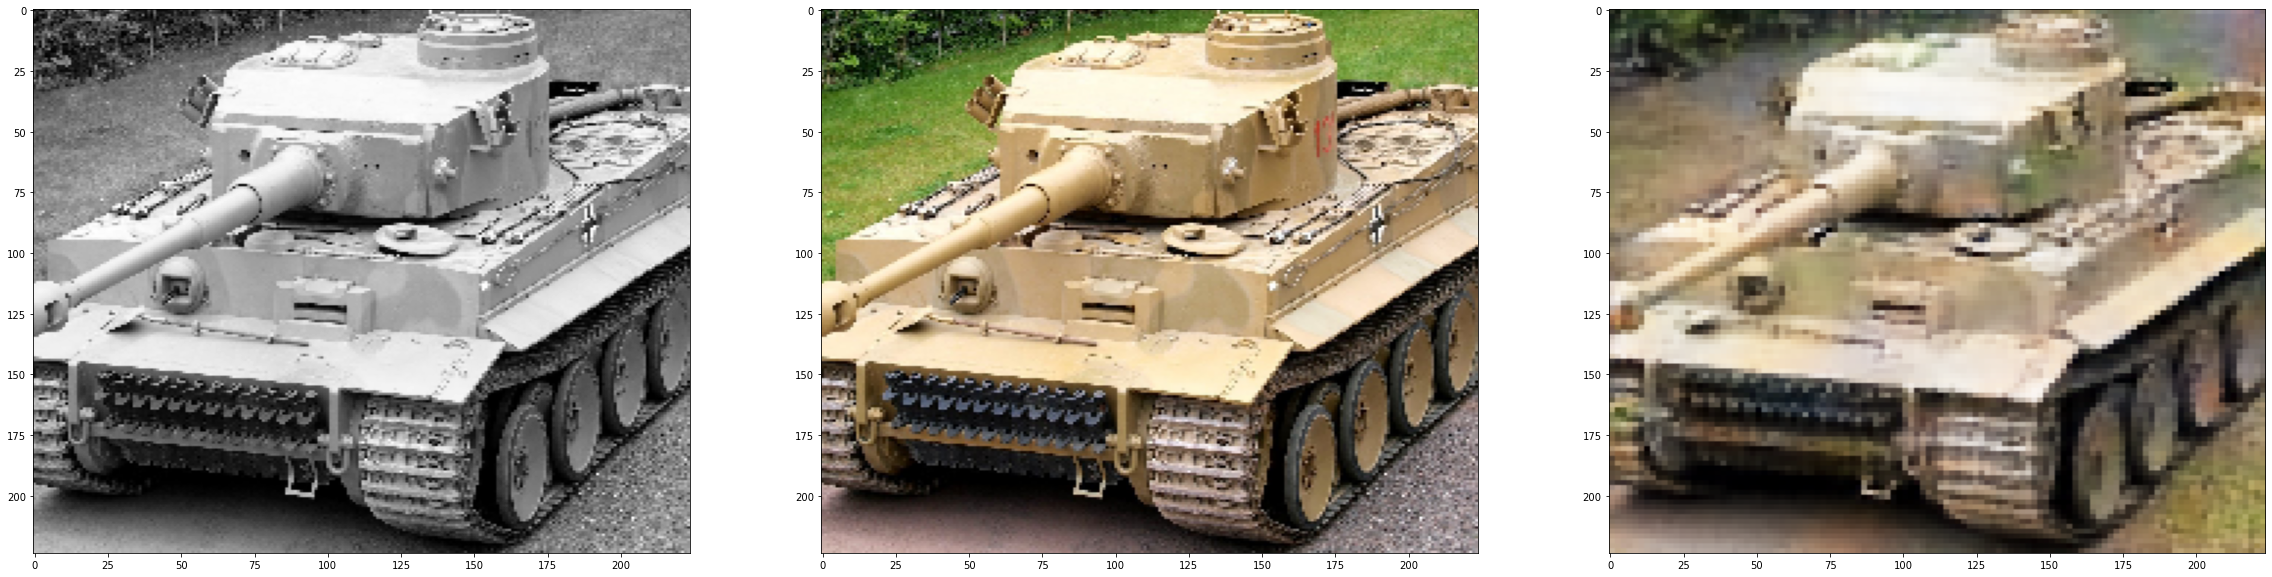

In [23]:
picNum = 0
f, axarr = plt.subplots(1,3, figsize=(40,10))
axarr[0].imshow(test_x[0][picNum],aspect="auto", cmap=plt.get_cmap('gray'))
axarr[1].imshow(test_y[0][picNum],aspect="auto")
axarr[2].imshow(testpic[picNum],aspect="auto")